In [93]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [94]:
data = datasets.load_boston() 

c:\Users\genca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

One feature regression

In [95]:
housing_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
lr1 = LinearRegression()
housing_df.corr()['target']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
target     1.000000
Name: target, dtype: float64

In [96]:
#The most correlated feature is LSTAT.
X_1=housing_df[['LSTAT']]
y=housing_df['target']
lr1.fit(X_1,y)

LinearRegression()

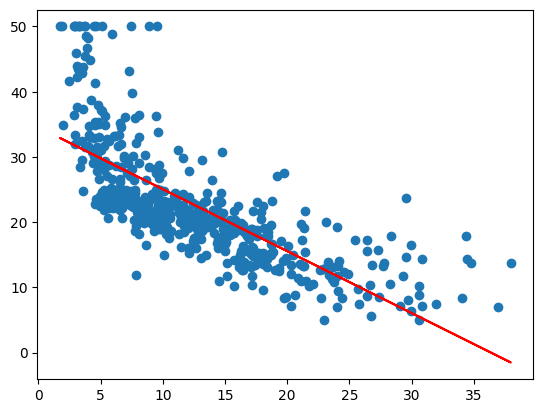

In [97]:
pyplot.scatter(X_1,y)
pyplot.plot(X_1,lr1.predict(X_1),color='red')

In [98]:
print(lr1.score(X_1,y))

0.5441462975864797


Performance Evaluation

In [99]:
lr2=LinearRegression()
X_2=housing_df[['CRIM',	'ZN',	'INDUS', 'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT']]

In [100]:
print(lr2.fit(X_2,y))
print(lr2.score(X_2,y))

LinearRegression()
0.7406426641094095


In [101]:
# y = lr.intercept_ + x*lr.coef_
print(np.sum((lr2.intercept_ +X_2 @ lr2.coef_ - y) **2)/(len(y))) 

21.894831181729202


Splitting the Dataset

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=0.4, random_state=0)

In [103]:
lr3 = LinearRegression()
lr3.fit(X_train,y_train)

LinearRegression()

In [104]:
print(lr3.score(X_test,y_test))

0.6882607142538016


In [105]:
#y = lr.intercept_ + x*lr.coef_
print(np.sum((lr3.intercept_ + X_test @ lr3.coef_  - y_test) **2)/(len(y_test)))

25.790362150702467
